# Programming Assignment 2 Part 1 - Decision Tree

In this programming assignment, you will implement a decision tree model.

*For Even Roll Number Students:*

* In this part, you have to implement a decision tree model to predict the cardio vascular disease based on various input features.
* Noiseless Dataset: ````cardio.csv````
* Noisy Dataset: ````cardio_noise.csv````

*For Odd Roll Number Students:*

* In this part, you have to implement a decision tree model to predict whether a patient has diabetes based on various input features.
* Noiseless Dataset: ````diabetes.csv````
* Noisy Dataset: ````diabetes_noise.csv````

The assignment zip file (ML_CS60050_A2.zip) contains the respective datasets which will be used in this assignment.

You have to write your code in this jupyter notebook. You have to write your code only between ### START CODE HERE ### and ### END CODE HERE ### comments.

### Assignment Submission Instructions

Please submit your assignment as a ZIP file that contains a folder named in the following format: `RollNo_ML_A2`. Inside this folder, include two Jupyter notebooks and a Report with the following names:

1. `RollNo_A2_Part1.ipynb`
2. `RollNo_A2_Part2.ipynb`
3. `RollNo_report.pdf`


Instructions for the Report:
* Summarize results from noiseless and noisy datasets.
* Compare performance and note the impact of noise.
* Conclude with key findings and implications.

Make sure that you replace `RollNo` with your actual roll number in both the folder name and the notebook filenames.

For example, if your roll number is `23CS60R11`, the folder should be named `23CS60R11_ML_A2`, and the three files should be named `23CS60R11_A2_Part1.ipynb`, `23CS60R11_A2_Part2.ipynb` and `RollNo_report.pdf`.

Submit this ZIP file as your assignment submission.

In [8]:
# Install pandas, numpy, seaborn, and matplotlib
! pip install pandas numpy seaborn matplotlib

# Install scikit-learn
! pip install scikit-learn

# Install IPython
! pip install ipython

# Install pygraphviz
! pip install pygraphviz
! python3 -m pip install -U --no-cache-dir  \
            --config-settings="--global-option=build_ext" \
            --config-settings="--global-option=-I$(brew --prefix graphviz)/include/" \
            --config-settings="--global-option=-L$(brew --prefix graphviz)/lib/" \
            pygraphviz

Please follow the instructions given in the file ````graphviz_installation.txt```` to install graphviz

In [9]:
# import all the necessary libraries here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score
import graphviz
from IPython.display import Image, display
import pygraphviz as pgv


In [10]:
df = pd.read_csv('diabetes.csv') # noiseless dataset
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

**Train, Validation, Test split**

In [11]:
train_df,test_df = train_test_split(df,test_size=0.2,random_state=1)
train_df,val_df = train_test_split(train_df,test_size=0.2,random_state=1)
train_df.shape,test_df.shape,val_df.shape

((491, 9), (154, 9), (123, 9))

In [12]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

### Model Implementation

# How the algorithm works

**We'll start with all examples at the root node then:**

**We'll calculate information gain for splitting on all possible features and pick the one with the highest value**

**Then we'll split the data according to the selected feature**

**We'll repeat this  process until stopping criteria is met**

## Key Points:

### Entropy
**Entropy function which is a way to measure impurity**

**Entropy is represented by this function**
$$H = -\sum\limits_{}^{} p_{i}\text{log}_2 p_{i} 
$$

**Where $(p_1)$ is the fraction of examples that are a certain class**


### Information Gain

**Information gain is the reduction in entropy when he make a split**

**Recall that our goal is to choose the split that gives the highest information gain, information gain equation =**

**$$H(p_1^\text{node})- (w^{\text{left}}H(p_1^\text{left}) + w^{\text{right}}H(p_1^\text{right}))$$**
**where** 
- $H(p_1^\text{node})$ is entropy at the node 
- $H(p_1^\text{left})$ and $H(p_1^\text{right})$ are the entropies at the left and the right branches resulting from the split
- $w^{\text{left}}$ and $w^{\text{right}}$ are the proportion of examples at the left and right branch respectively



### Decision Tree visualization using graphviz

In [13]:
graph = pgv.AGraph(strict=True, directed=True)
graph2 = pgv.AGraph(strict=True, directed=True)

## Start the Implementation

In [14]:

class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

class DecisionTree:
    def __init__(self):
        self.root = Node(None)
        self.height = -1

    def find_splits(self, data, column_index):
        """
        Identifies potential split points for a given feature.
        
        Parameters:
            data (numpy.ndarray): The dataset used for finding splits.
            column_index (int): The index of the column for which to find potential splits.
        
        Returns:
            potential_splits (list): A list of potential split points for the specified feature.
        """

        x = data[:,:-1]
        potential_splits = []
        
        ### START CODE HERE ###

        # CODE HERE (REFER LECTURE SLIDES)

        # Extract the unique values of the feature
        unique_values = np.unique(x[:, column_index])
        # Calculate the potential split points
        potential_splits = [(unique_values[i] + unique_values[i + 1]) / 2 for i in range(len(unique_values) - 1)]

        ### END CODE HERE ###

        return potential_splits


    def calculate_entropy(self, data):
        """
        Calculates the entropy of the dataset.
        
        Parameters:
            data (numpy.ndarray): The dataset for which to calculate entropy.
        
        Returns:
            entropy (float): The entropy value of the dataset.
        """
        y = data[:, -1]
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / counts.sum()
        ### START CODE HERE ###

        entropy =  -np.sum(probabilities * np.log2(probabilities))
        
        ### END CODE HERE ###
        return entropy

    def calculate_information_gain(self, data, column_no, value):
        """
        Calculates the information gain resulting from splitting the data on a specific feature at a specific value.
        
        Parameters:
            data (numpy.ndarray): The dataset to split.
            column_no (int): The index of the feature used to split the data.
            value (float): The value at which to split the feature.
        
        Returns:
            information_gain (float): The information gain from the split.
        """
        parent_entropy = self.calculate_entropy(data)
        left_data = data[data[:, column_no] <= value]
        right_data = data[data[:, column_no] > value]

        n = len(left_data) + len(right_data)
        p_left_data = len(left_data) / n
        p_right_data = len(right_data) / n

        ### START CODE HERE ###

        child_entropy = p_left_data * self.calculate_entropy(left_data) + p_right_data * self.calculate_entropy(right_data)
        information_gain = parent_entropy - child_entropy

        ### END CODE HERE ###

        return information_gain

    def majority(self, data):
        """
        Determines the majority class label in the dataset.
        
        Parameters:
            data (pandas.DataFrame): The dataset to classify.
        
        Returns:
            majority_class (int): The label of the majority class.
        """
        ### START CODE HERE ###
        cls, count = np.unique(data["Outcome"], return_counts=True)
        ### END CODE HERE ###
        return cls[np.argmax(count)]

    def classify(self, data, edge):
        """
        Classifies a dataset as a leaf node.
        
        Parameters:
            data (pandas.DataFrame): The dataset to classify.
            edge (int): The index of the parent edge.
        
        Returns:
            leaf (Node): A leaf node with classification information.
        """
        classification = self.majority(data)
        entropy = self.calculate_entropy(data.values)
        d = {"ID": "Leaf", "Classification": classification, "Parent_Edge": edge, "Entropy": entropy, "Samples": data.shape[0]}
        leaf = Node(d)
        return leaf
    def build_tree(self, data, max_depth, attributes, edge, height):
        """
        A recursive utility function for building the decision tree.
        
        Parameters:
            data (pandas.DataFrame): The dataset to build the tree from.
            max_depth (int): The maximum allowed depth of the tree.
            attributes (list): The list of attributes used in the dataset.
            edge (int): The index of the parent edge.
            height (int): The current height of the tree.
        
        Returns:
            node (Node): The root node of the subtree created.
        """
        ### START CODE HERE ### 

        # CODE HERE ... Implement the logic to extract the leaf node
        if height >= max_depth or len(np.unique(data["Outcome"])) == 1:
            leaf = self.classify(data, edge)
            return leaf
            
        ### END CODE HERE ###
        
        
        best = {"ID": "", "best_attribute": "", "best_gain": -1, "best_split": -1, "best_entropy": -1}


        ### START CODE HERE ###

        # CODE TO EXTRACT THE BEST ATTRIBUTE AND STORE IT IN best VARIABLE
        for attribute in attributes:
            attribute_index = data.columns.get_loc(attribute)
            splits = self.find_splits(data.values, attribute_index)
            for split in splits:
                gain = self.calculate_information_gain(data.values, attribute_index, split)
                if gain > best["best_gain"]:
                    best["best_attribute"] = attribute
                    best["best_gain"] = gain
                    best["best_split"] = split
                    best["best_entropy"] = self.calculate_entropy(data.values)
        
        if(best["best_gain"] == 0):
            leaf = self.classify(data, edge)
            return leaf
        if best["best_attribute"] == "":
            leaf = self.classify(data, edge)
            return leaf
        if best["best_entropy"] <= 0:
            leaf = self.classify(data, edge)
            return leaf
        

        ### END HERE ###

        _, sample = np.unique(data["Outcome"], return_counts=True)
        d = {"ID": best["best_attribute"], "Entropy": best["best_entropy"], 
             "Samples": data.shape[0], "Parent_Edge": edge, 
             "Best_Split": best["best_split"], "Values": sample}
        node = Node(d)
        print(f"Creating node: {d}")  # Debugging statement
        node.left = self.build_tree(data[data[best["best_attribute"]] <= best["best_split"]], max_depth, attributes, 2 * edge + 1, height + 1)
        node.right = self.build_tree(data[data[best["best_attribute"]] > best["best_split"]], max_depth, attributes, 2 * edge + 2, height + 1)

        root = f'{d["ID"]} <= {d["Best_Split"]}\nEntropy = {d["Entropy"]}\nSamples = {d["Samples"]}\nValues = {sample}'
        
        graph.add_node(str(edge), label=root)
        graph.add_edge(str(edge), str(2 * edge + 1))
        graph.add_edge(str(edge), str(2 * edge + 2))
        return node

    def fit(self, data, max_depth=100):
        """
        Fits the decision tree model to the provided dataset.
        
        Parameters:
            data (pandas.DataFrame): The dataset to fit the tree to.
            max_depth (int): The maximum allowed depth of the tree.
        
        Returns:
            None
        """
        attributes = data.columns.tolist()[:-1]
        self.attributes = np.array(attributes)
        self.root = self.build_tree(data, max_depth, attributes, 0, 0)
        
    def plt(self, graph, node, vert):
        """
        Plots the decision tree using a graph representation.
        
        Parameters:
            graph (Graph): The graph object to use for plotting.
            node (Node): The current node in the tree.
            vert (int): The current vertex in the graph.
        
        Returns:
            root (str): The label of the current node.
        """
        d = node.data
        if "Classification" in node.data.keys():
            root = f'{d["ID"]}\nEntropy = {d["Entropy"]}\nSamples = {d["Samples"]}\nClass = {d["Classification"]}'
            graph.add_node(str(vert), label=root)
            return root
        
        root = f'{d["ID"]} <= {d["Best_Split"]}\nEntropy = {d["Entropy"]}\nSamples = {d["Samples"]}\nValues = {d["Values"]}'
        graph.add_node(str(vert), label=root)
        root1 = self.plt(graph, node.left, 2 * vert + 1)
        graph.add_node(str(2 * vert + 1), label=root1)
        root2 = self.plt(graph, node.right, 2 * vert + 2)
        graph.add_node(str(2 * vert + 2), label=root2)
        
        graph.add_edge(str(vert), str(2 * vert + 1))
        graph.add_edge(str(vert), str(2 * vert + 2))
        return root

    def prune_util(self, node):
        """
        Utility function for pruning a node in the decision tree.
        
        Parameters:
            node (Node): The node to prune.
        
        Returns:
            d (dict): The data for the pruned leaf node.
        """
        d = {"ID": "Leaf", "Classification": 0, "Parent_Edge": node.data["Parent_Edge"], 
             "Entropy": 0, "Samples": node.data["Samples"]}
        if node.data["Values"][0] > node.data["Values"][1]:
            d["Classification"] = 0
        else:
            d["Classification"] = 1
        return d
        
    def prune(self, val_df, node):
        """
        Prunes the decision tree to avoid overfitting.
        
        Parameters:
            val_df (pandas.DataFrame): The validation dataset used to evaluate pruning.
            node (Node): The current node to consider pruning.
        
        Returns:
            None
        """
        if "Classification" in node.data.keys():
            return
        
        ### START CODE HERE ###

        # RECURSIVE CALLS TO IT'S CHILDREN
        self.prune(val_df, node.left)
        self.prune(val_df, node.right)

        ### END CODE HERE ###
        
        curr_val = accuracy_score(val_df.values[:, -1], self.predict(val_df.values[:, :-1]))

        tmp1 = node.left
        tmp2 = node.right
        tmp = node.data
        node.left = None
        node.right = None

        node.data = self.prune_util(node)

        new_val = accuracy_score(val_df.values[:, -1], self.predict(val_df.values[:, :-1]))

        # Decide whether to keep the pruning or revert to the original node

        ### START CODE HERE ###

        # Implement the decision logic for keeping or reverting pruning
        if new_val < curr_val:
            node.left = tmp1
            node.right = tmp2
            node.data = tmp

        ### END CODE HERE ###

    def predict_one(self, data):
        """
        Predicts the class label for a single data point.
        
        Parameters:
            data (numpy.ndarray): The data point to classify.
        
        Returns:
            classification (int): The predicted class label.
        """
        node = self.root
        while "Classification" not in node.data.keys():
            d = node.data
            if data[np.argwhere(self.attributes == d["ID"]).squeeze()] <= d["Best_Split"]:
                node = node.left
            else:
                node = node.right
        return node.data["Classification"]

    def predict(self, X):
        """
        Predicts the class labels for a dataset.
        
        Parameters:
            X (numpy.ndarray): The dataset to classify.
        
        Returns:
            Y_pred (numpy.ndarray): The predicted class labels.
        """
        ### START CODE HERE ###
        return np.array([self.predict_one(x) for x in X])

        ### END CODE HERE ###

In [15]:
model = DecisionTree()
model.fit(train_df)

Creating node: {'ID': 'Glucose', 'Entropy': np.float64(0.9287770565049256), 'Samples': 491, 'Parent_Edge': 0, 'Best_Split': np.float64(123.5), 'Values': array([322, 169])}
Creating node: {'ID': 'BMI', 'Entropy': np.float64(0.6705250693158381), 'Samples': 296, 'Parent_Edge': 1, 'Best_Split': np.float64(26.45), 'Values': array([244,  52])}
Creating node: {'ID': 'DiabetesPedigreeFunction', 'Entropy': np.float64(0.09140162014739274), 'Samples': 86, 'Parent_Edge': 3, 'Best_Split': np.float64(0.669), 'Values': array([85,  1])}
Creating node: {'ID': 'DiabetesPedigreeFunction', 'Entropy': np.float64(0.41381685030363374), 'Samples': 12, 'Parent_Edge': 8, 'Best_Split': np.float64(0.7055), 'Values': array([11,  1])}
Creating node: {'ID': 'Glucose', 'Entropy': np.float64(0.7997594113291762), 'Samples': 210, 'Parent_Edge': 4, 'Best_Split': np.float64(99.5), 'Values': array([159,  51])}
Creating node: {'ID': 'Age', 'Entropy': np.float64(0.46121604051390946), 'Samples': 82, 'Parent_Edge': 9, 'Best_Sp

### Plotting the Decision Tree before Pruning

In [16]:
graph.draw("Decision_Tree_Before_Pruning.png", prog="dot")

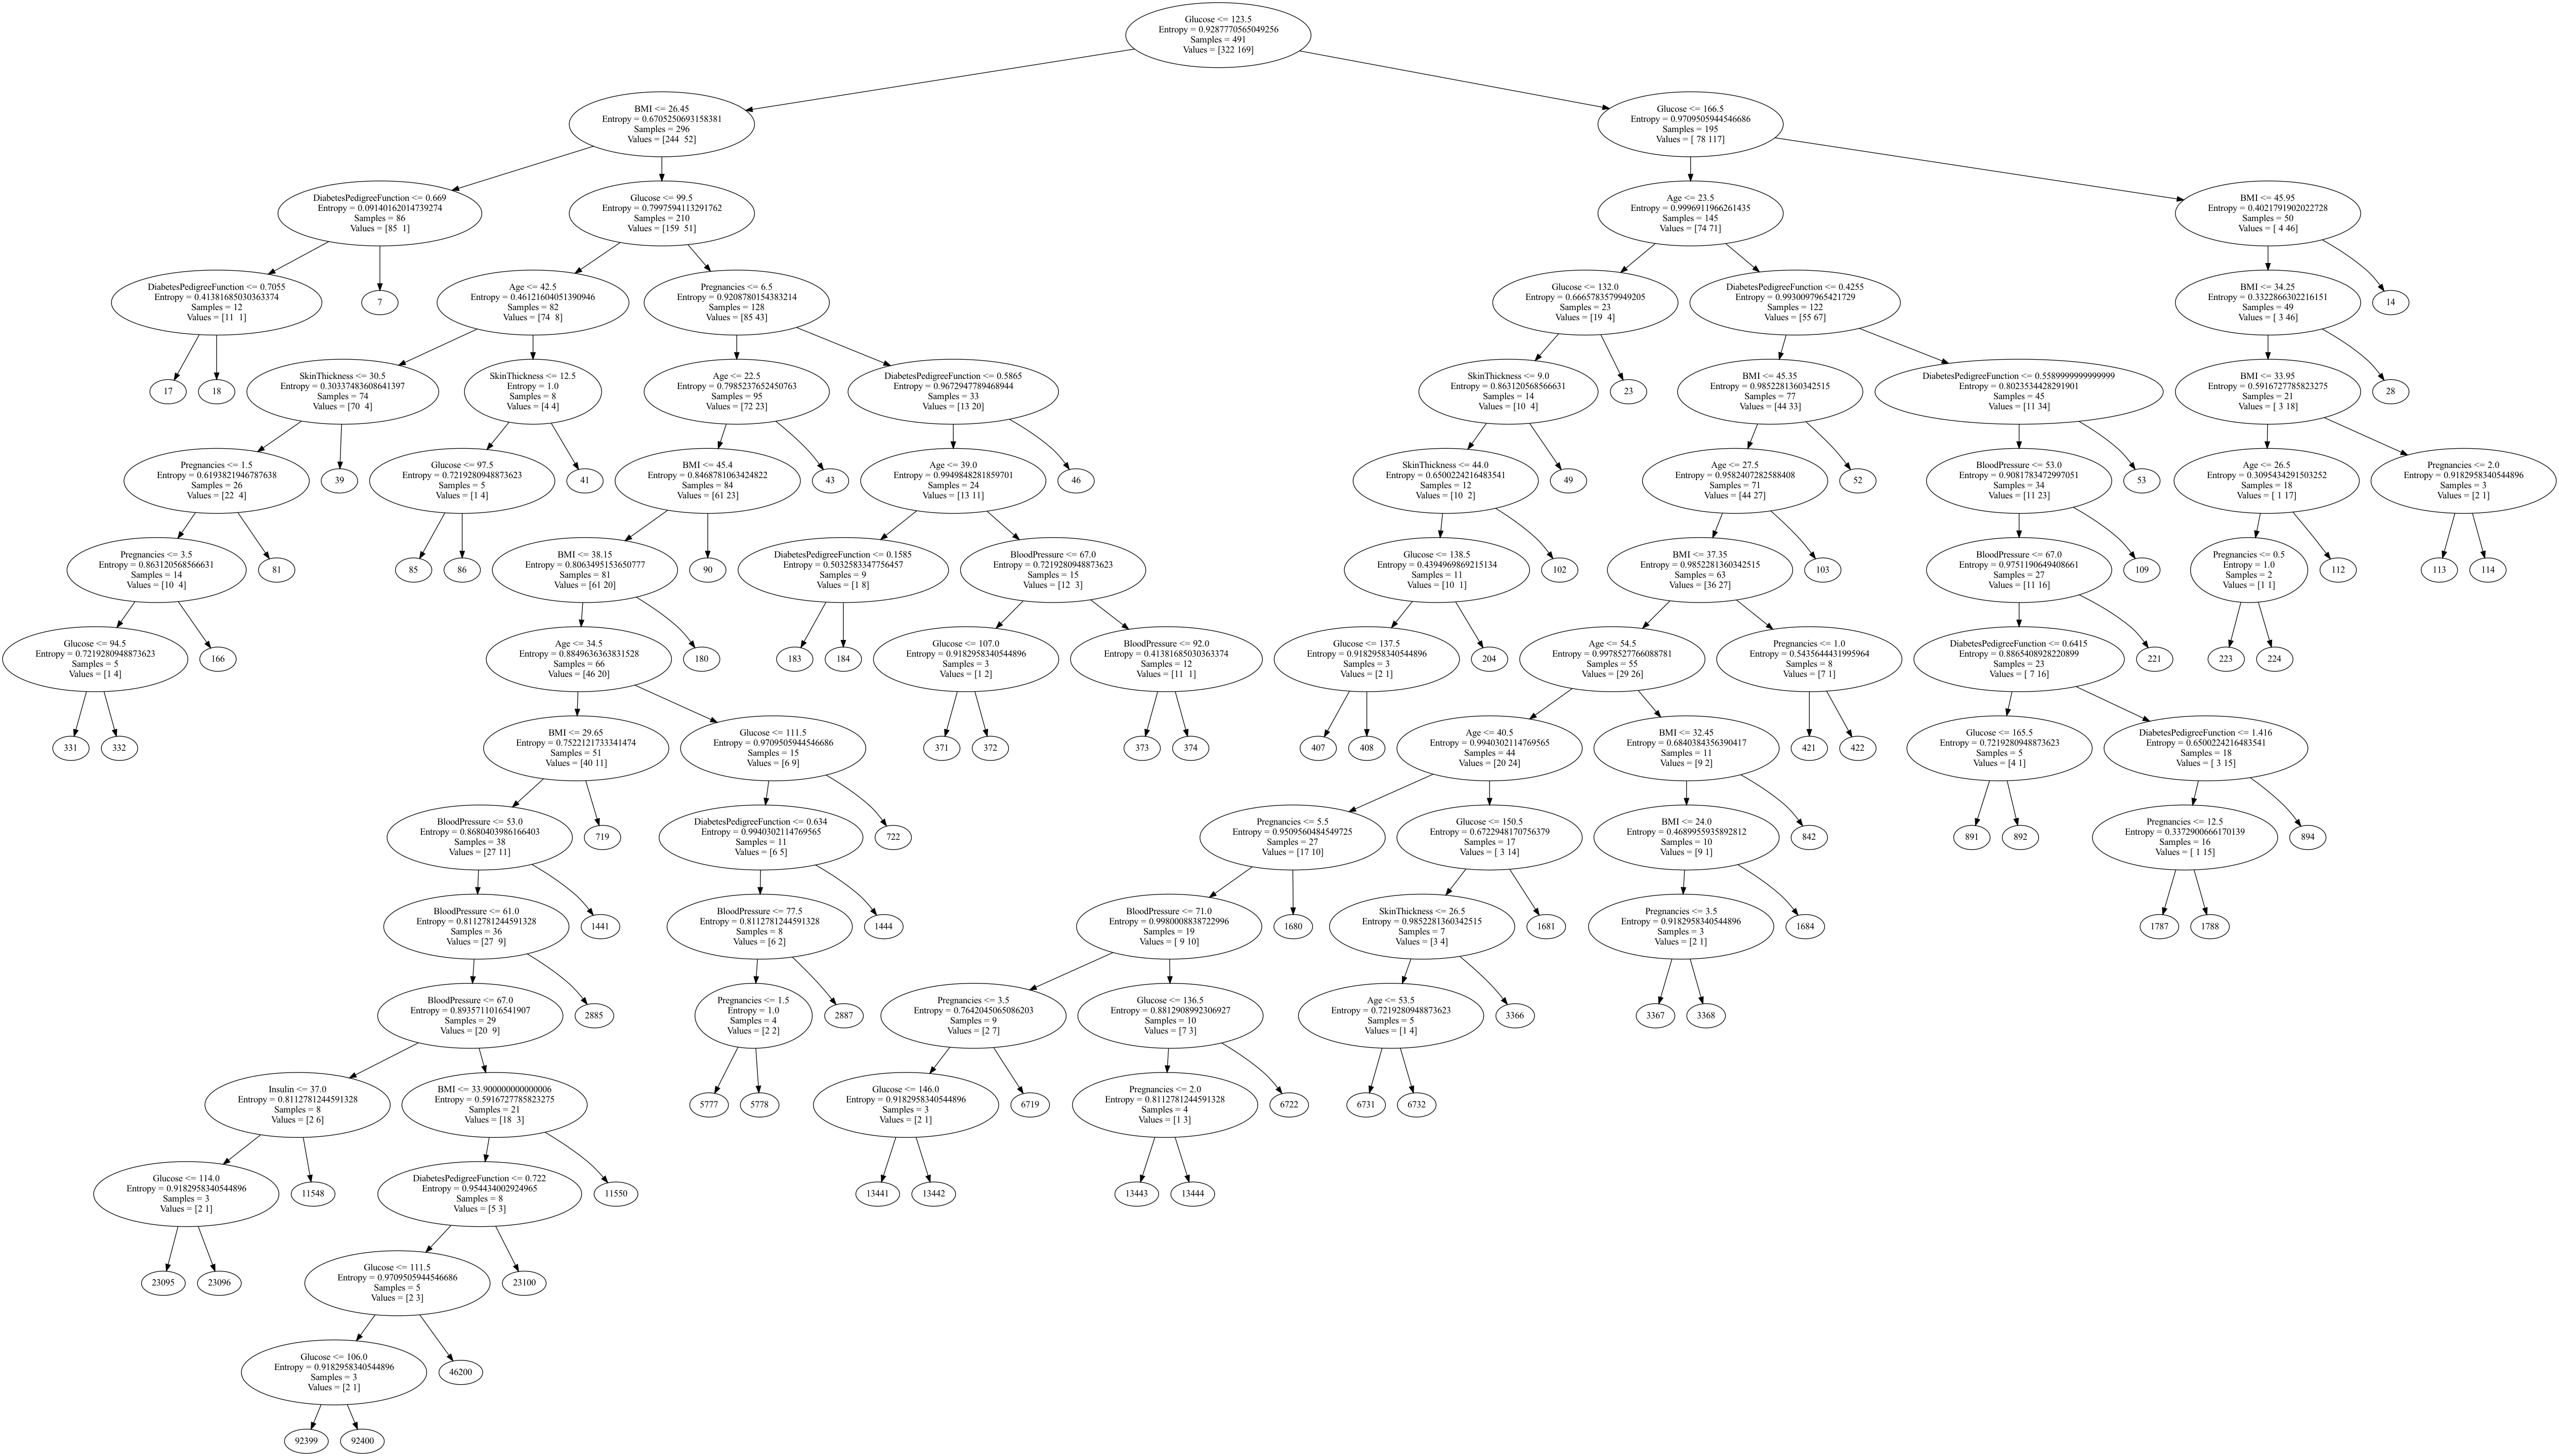

In [17]:
display(Image(filename='Decision_Tree_Before_Pruning.png'))

### Testing before Pruning

In [18]:
X_test = test_df.values[:,:-1]
Y_test = test_df.values[:,-1]

In [19]:
Y_pred = model.predict(X_test)

In [20]:
print("Accuracy,Macro Precision, Macro Recall Before Pruning")
accuracy_score(Y_test,Y_pred),precision_score(Y_test,Y_pred,average='macro'),recall_score(Y_test,Y_pred,average = 'macro')

Accuracy,Macro Precision, Macro Recall Before Pruning


(0.7142857142857143,
 np.float64(0.6913470115967886),
 np.float64(0.696969696969697))

### Reduced Error Pruning

In [21]:
model.prune(val_df,model.root)

In [22]:
_ =model.plt(graph2,model.root,0)

In [23]:
graph2.draw("Decision_Tree_After_Pruning.png", prog="dot")

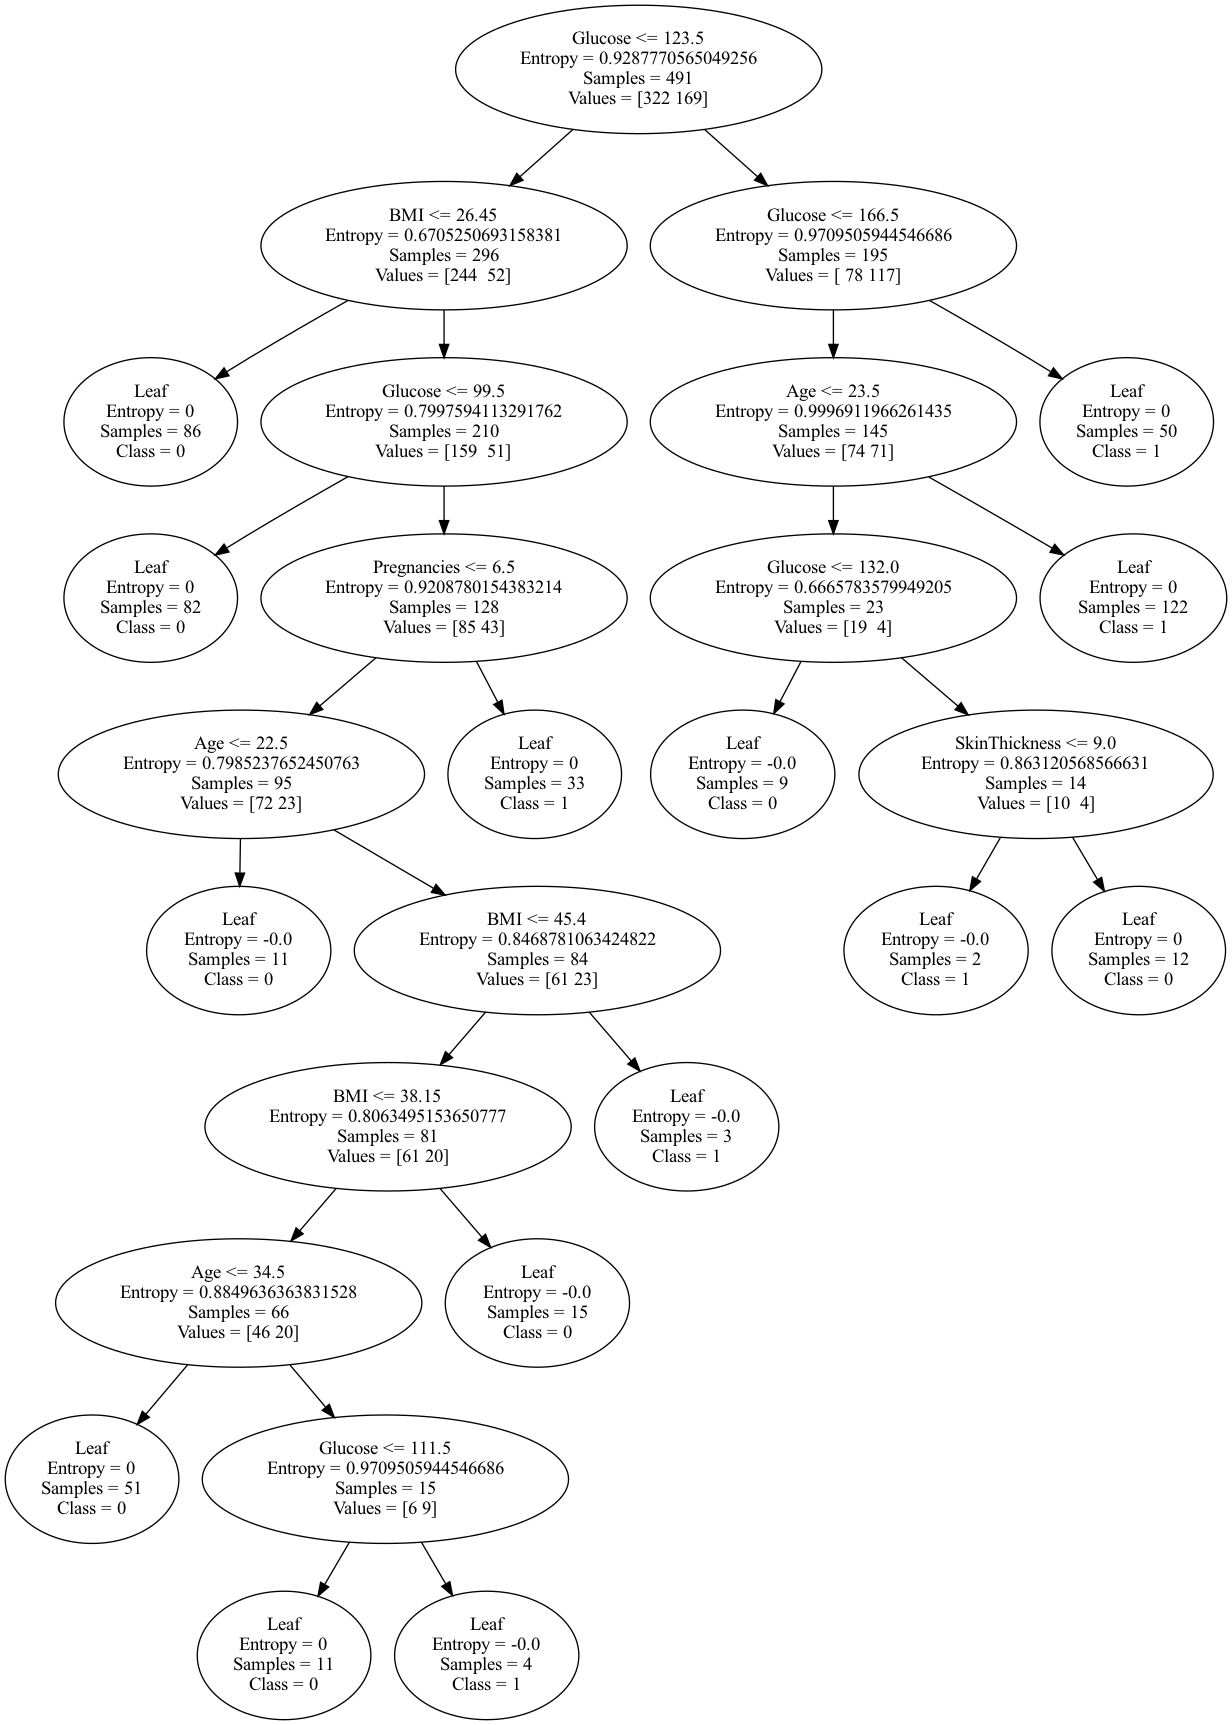

In [24]:
display(Image(filename='Decision_Tree_After_Pruning.png'))

### Testing after Pruning

In [25]:
Y_pred = model.predict(X_test)
print("Accuracy,Macro Precision, Macro Recall After Pruning")
accuracy_score(Y_test,Y_pred),precision_score(Y_test,Y_pred,average='macro'),recall_score(Y_test,Y_pred,average = 'macro')

Accuracy,Macro Precision, Macro Recall After Pruning


(0.7662337662337663,
 np.float64(0.7541346973572037),
 np.float64(0.7737373737373738))

## Noisy Dataset

In [26]:
df2 = pd.read_csv('diabetes_noise.csv') # noise dataset
df2.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [27]:
train_df2,test_df2 = train_test_split(df2,test_size=0.2,random_state=1)
train_df2,val_df2 = train_test_split(train_df2,test_size=0.2,random_state=1)
train_df2.shape,test_df2.shape,val_df2.shape

((588, 9), (185, 9), (148, 9))

In [28]:
model2 = DecisionTree()
model2.fit(train_df2)

X_test2 = test_df2.values[:,:-1]
Y_test2 = test_df2.values[:,-1]

Creating node: {'ID': 'Glucose', 'Entropy': np.float64(0.964447447529093), 'Samples': 588, 'Parent_Edge': 0, 'Best_Split': np.float64(127.5), 'Values': array([359, 229])}
Creating node: {'ID': 'DiabetesPedigreeFunction', 'Entropy': np.float64(0.8358219749695703), 'Samples': 357, 'Parent_Edge': 1, 'Best_Split': np.float64(0.6455), 'Values': array([262,  95])}
Creating node: {'ID': 'BMI', 'Entropy': np.float64(0.7548031367093204), 'Samples': 281, 'Parent_Edge': 3, 'Best_Split': np.float64(29.95), 'Values': array([220,  61])}
Creating node: {'ID': 'Insulin', 'Entropy': np.float64(0.5774010719276959), 'Samples': 131, 'Parent_Edge': 7, 'Best_Split': np.float64(50.0), 'Values': array([113,  18])}
Creating node: {'ID': 'Pregnancies', 'Entropy': np.float64(0.6840384356390417), 'Samples': 99, 'Parent_Edge': 15, 'Best_Split': np.float64(6.5), 'Values': array([81, 18])}
Creating node: {'ID': 'Age', 'Entropy': np.float64(0.587311608997759), 'Samples': 85, 'Parent_Edge': 31, 'Best_Split': np.float6

In [29]:
Y_pred2 = model2.predict(X_test2)
print("Accuracy,Macro Precision, Macro Recall Before Pruning")
accuracy_score(Y_test2,Y_pred2),precision_score(Y_test2,Y_pred2,average='macro'),recall_score(Y_test2,Y_pred2,average = 'macro')

Accuracy,Macro Precision, Macro Recall Before Pruning


(0.4810810810810811,
 np.float64(0.4593166175024582),
 np.float64(0.4600434572670208))

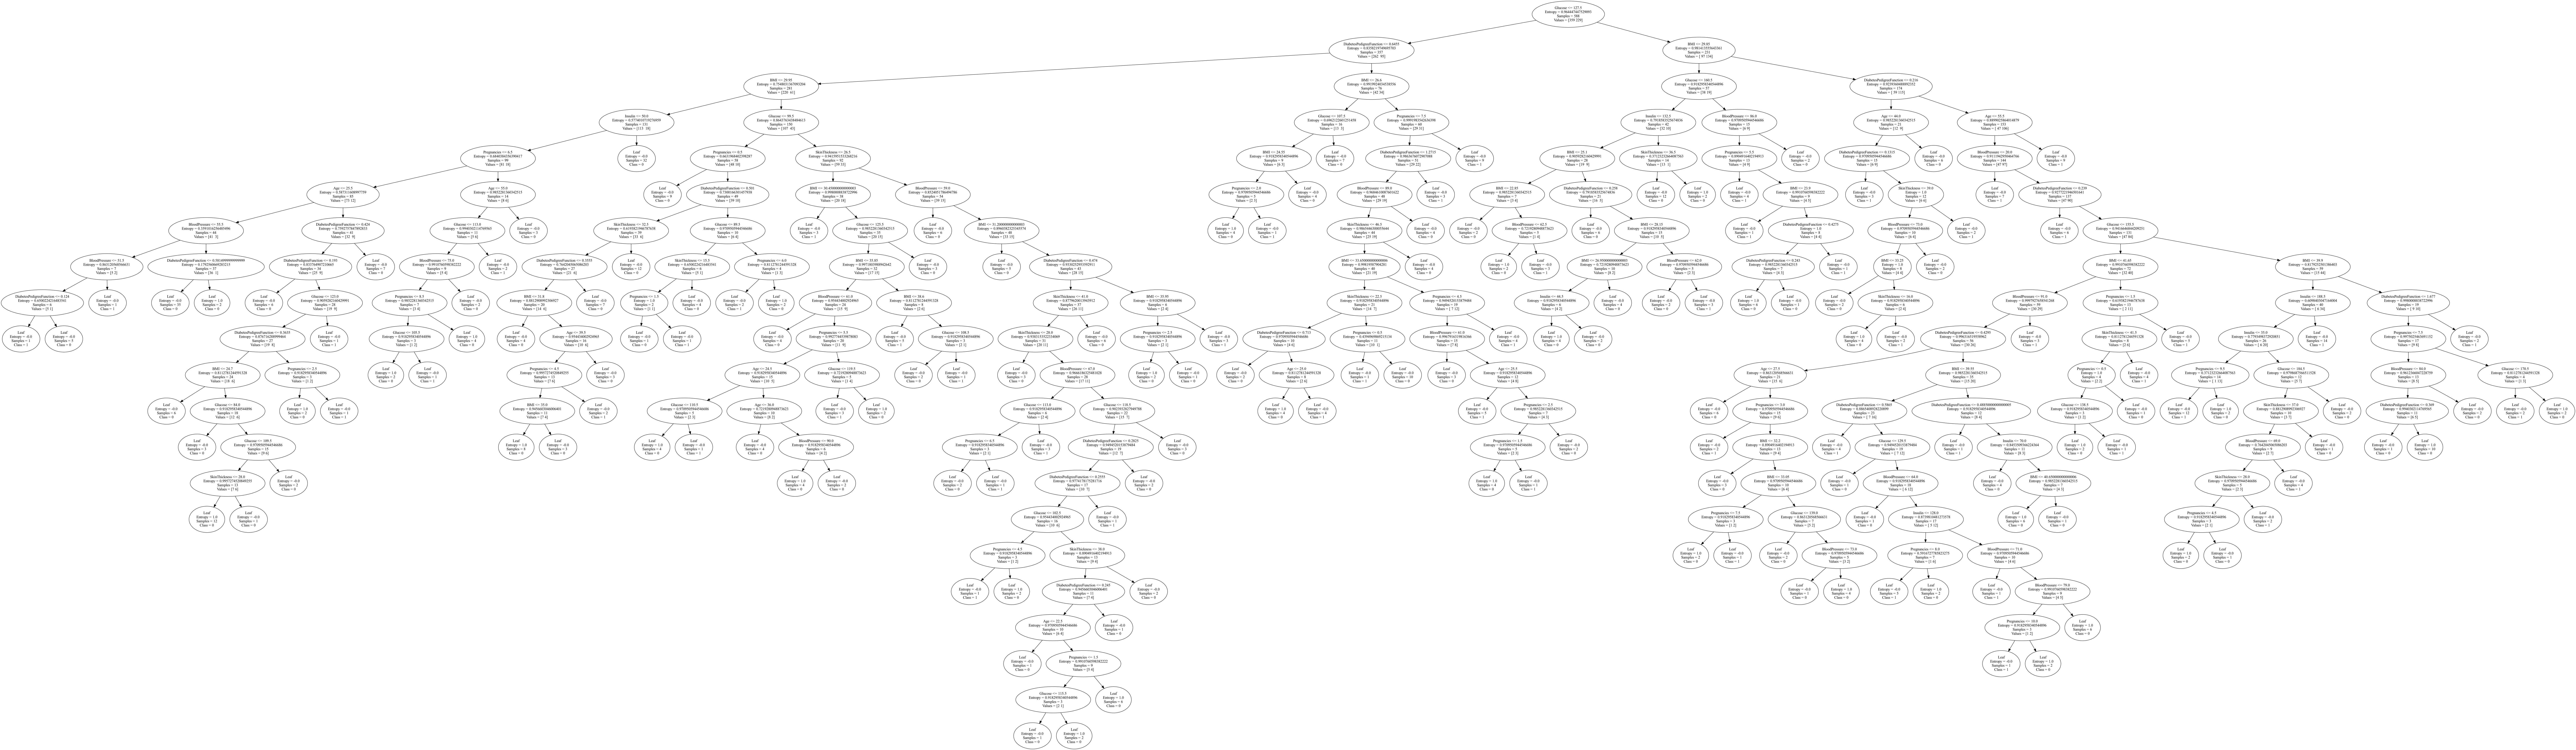

In [30]:
# show the decision tree before pruning
graph3 = pgv.AGraph(strict=True, directed=True)
_ =model2.plt(graph3,model2.root,0)
graph3.draw("Decision_Tree_Before_Pruning_Noise.png", prog="dot")
display(Image(filename='Decision_Tree_Before_Pruning_Noise.png'))

### Reduced Error Pruning on noisy dataset

In [31]:
model2.prune(val_df2,model2.root)
_ =model2.plt(graph2,model2.root,0)
Y_pred2 = model2.predict(X_test2)
print("Accuracy,Macro Precision, Macro Recall After Pruning")
accuracy_score(Y_test2,Y_pred2),precision_score(Y_test2,Y_pred2,average='macro'),recall_score(Y_test2,Y_pred2,average = 'macro')


Accuracy,Macro Precision, Macro Recall After Pruning


(0.5783783783783784,
 np.float64(0.5660196501317997),
 np.float64(0.5665137614678899))

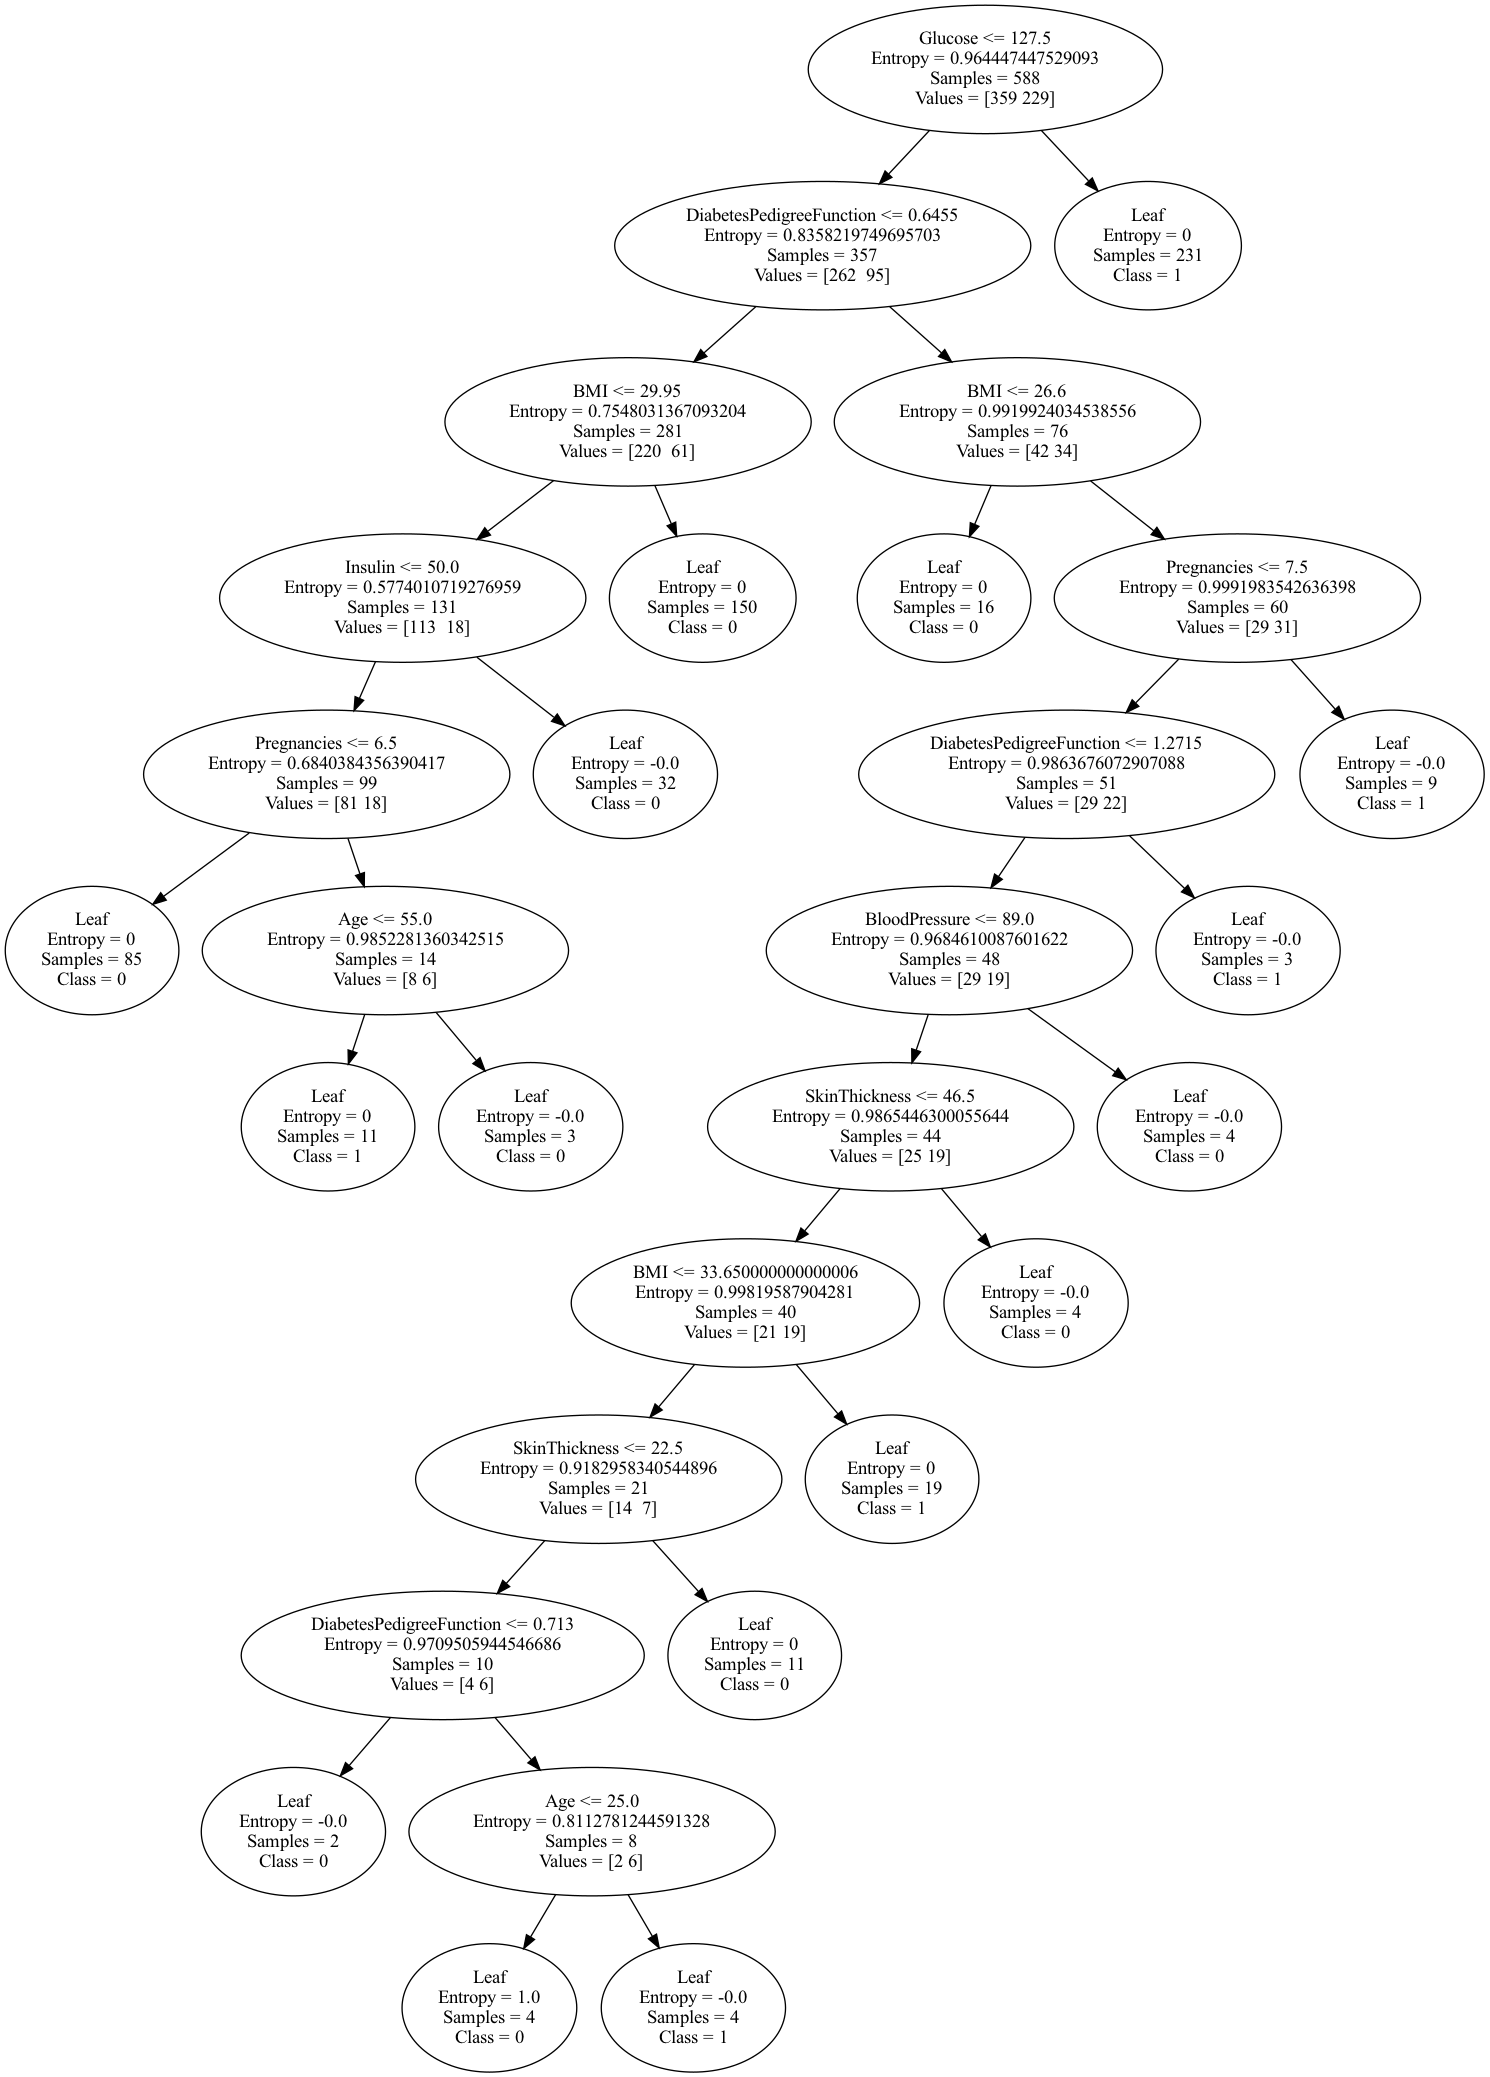

In [32]:
graph4 = pgv.AGraph(strict=True, directed=True)
_ =model2.plt(graph4,model2.root,0)
graph4.draw("Decision_Tree_After_Pruning_Noise.png", prog="dot")
display(Image(filename='Decision_Tree_After_Pruning_Noise.png'))

## **Using pre-pruning**

#### *Modify your Decision Tree model or its training process such that the accuracy difference between the noisy and noiseless datasets is minimized.*

###  I will use pre pruning to avoid overfitting
## using max_depth, min_samples_split, min_samples_leaf


In [33]:
class Node:
    def __init__(self, gini, num_samples, num_samples_per_class, predicted_class):
        self.gini = gini
        self.num_samples = num_samples
        self.num_samples_per_class = num_samples_per_class
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None

class ModifiedDecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.root = None

    def fit(self, X, y):
        self.n_classes_ = len(set(y))
        self.n_features_in_ = X.shape[1]
        self.root = self._grow_tree(X, y)

    def predict(self, X):
        return [self._predict(inputs) for inputs in X]

    def _gini(self, y):
        m = len(y)
        return 1.0 - sum((np.sum(y == c) / m) ** 2 for c in np.unique(y))

    def _grow_tree(self, X, y, depth=0):
        num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes_)]
        predicted_class = np.argmax(num_samples_per_class)
        node = Node(
            gini=self._gini(y),
            num_samples=len(y),
            num_samples_per_class=num_samples_per_class,
            predicted_class=predicted_class,
        )

        if depth < self.max_depth and len(y) >= self.min_samples_split and node.gini > 0:
            idx, thr = self._best_split(X, y)
            if idx is not None:
                indices_left = X[:, idx] < thr
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                if len(y_left) >= self.min_samples_leaf and len(y_right) >= self.min_samples_leaf:
                    node.feature_index = idx
                    node.threshold = thr
                    node.left = self._grow_tree(X_left, y_left, depth + 1)
                    node.right = self._grow_tree(X_right, y_right, depth + 1)
        return node

    def _best_split(self, X, y):
        m, n = X.shape
        if m <= 1:
            return None, None

        num_parent = [np.sum(y == c) for c in range(self.n_classes_)]
        best_gini = 1.0 - sum((num / m) ** 2 for num in num_parent)
        best_idx, best_thr = None, None

        for idx in range(n):
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))
            num_left = [0] * self.n_classes_
            num_right = num_parent.copy()
            for i in range(1, m):
                c = classes[i - 1]
                num_left[c] += 1
                num_right[c] -= 1
                gini_left = 1.0 - sum((num_left[x] / i) ** 2 for x in range(self.n_classes_))
                gini_right = 1.0 - sum((num_right[x] / (m - i)) ** 2 for x in range(self.n_classes_))
                gini = (i * gini_left + (m - i) * gini_right) / m
                if thresholds[i] == thresholds[i - 1]:
                    continue
                if gini < best_gini:
                    best_gini = gini
                    best_idx = idx
                    best_thr = (thresholds[i] + thresholds[i - 1]) / 2
        return best_idx, best_thr

    def _predict(self, inputs):
        node = self.root
        while node.left:
            if inputs[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.predicted_class

### **Noiseless dataset**

In [34]:
print(df.shape)
# split the data into features and target variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print(X.shape, y.shape)

(768, 9)
(768, 8) (768,)


In [35]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# we dont need to split the data into training and validation sets

(614, 8) (154, 8) (614,) (154,)


In [36]:
model3 = ModifiedDecisionTree(max_depth=5, min_samples_split=2, min_samples_leaf=1)

model3.fit(X_train, y_train)

y_pred = model3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7337662337662337


In [37]:
# pre pruning inbuitl decision tree
from sklearn.tree import DecisionTreeClassifier

model5 = DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=1)
model5.fit(X_train, y_train)
y_pred = model5.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7337662337662337


#### Building decision tree using pre-pruning on
### **Noisy dataset**

In [38]:
print(df2.shape)

# split the data into features and target variable
X2 = df2.iloc[:, :-1].values
y2 = df2.iloc[:, -1].values
print(X2.shape, y2.shape)

# split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=1)
print(X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape)

(921, 9)
(921, 8) (921,)
(736, 8) (185, 8) (736,) (185,)


In [39]:
model4 = ModifiedDecisionTree(max_depth=5, min_samples_split=2, min_samples_leaf=1)
model4.fit(X_train2, y_train2)
y_pred2 = model4.predict(X_test2)
accuracy = accuracy_score(y_test2, y_pred2)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6270270270270271


In [40]:
# pre pruning inbuitl decision tree
model6 = DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=1)
model6.fit(X_train2, y_train2)
y_pred2 = model6.predict(X_test2)
accuracy = accuracy_score(y_test2, y_pred2)
print(f"Accuracy: {accuracy}")


Accuracy: 0.6270270270270271
